In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation
from tensorflow.keras.utils import normalize, to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

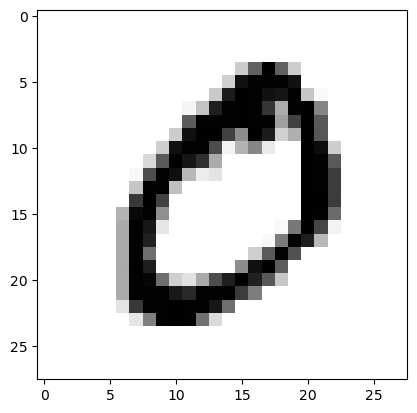

In [3]:
plt.imshow(X_train[1], cmap = plt.cm.binary)
plt.show()

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

#model.summary()

2022-10-01 16:59:52.940036: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-01 16:59:52.941639: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mse'])

In [8]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose = 1,
    shuffle = True
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 12s 215us/sample - loss: 0.5427 - accuracy: 0.8369 - mse: 0.0240 - val_loss: 0.1639 - val_accuracy: 0.9523 - val_mse: 0.0073
Epoch 2/20
54000/54000 [==============================] - 11s 200us/sample - loss: 0.2909 - accuracy: 0.9158 - mse: 0.0130 - val_loss: 0.1290 - val_accuracy: 0.9603 - val_mse: 0.0058
Epoch 3/20
54000/54000 [==============================] - 11s 203us/sample - loss: 0.2391 - accuracy: 0.9299 - mse: 0.0108 - val_loss: 0.1042 - val_accuracy: 0.9697 - val_mse: 0.0046
Epoch 4/20
54000/54000 [==============================] - 11s 211us/sample - loss: 0.2146 - accuracy: 0.9380 - mse: 0.0096 - val_loss: 0.1029 - val_accuracy: 0.9700 - val_mse: 0.0046
Epoch 5/20
54000/54000 [==============================] - 11s 203us/sample - loss: 0.1954 - accuracy: 0.9425 - mse: 0.0088 - val_loss: 0.0942 - val_accuracy: 0.9723 - val_mse: 0.0043
Epoch 6/20
54000/54000 [============

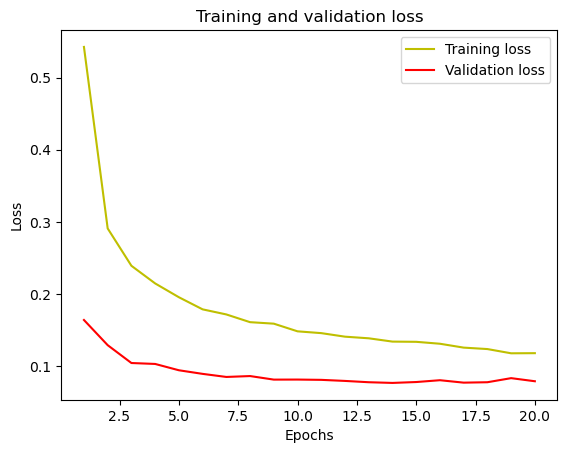

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

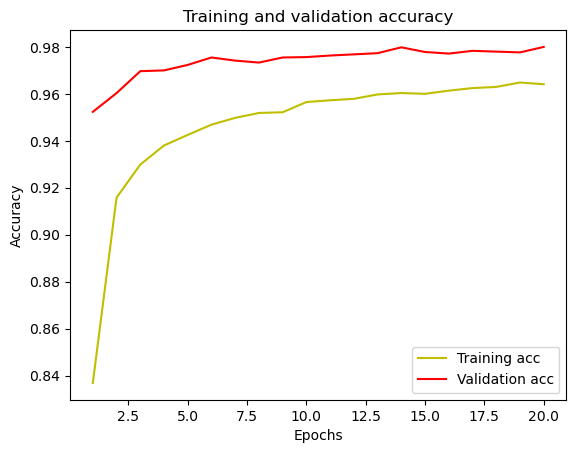

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.09688599915907252, 0.9749, 0.003887719]

In [12]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [14]:
img = load_img('../1.png')
digit = img_to_array(img)

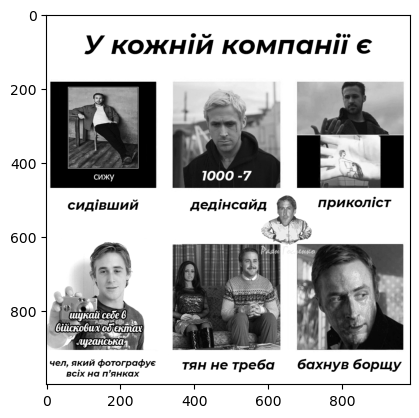

In [15]:
digit = np.abs(digit - 255)
plt.imshow(digit[:, :, 0], cmap = plt.cm.binary)
digit = normalize(digit, axis =1)

In [16]:
model.predict([[digit[:, :, 0]]]).argmax()

ValueError: Error when checking input: expected flatten_input to have shape (28, 28) but got array with shape (1000, 983)